In [1]:
import qiskit
qiskit.__qiskit_version__

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'qiskit-terra': '0.21.1', 'qiskit-aer': '0.10.4', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.37.1', 'qiskit-nature': '0.4.2', 'qiskit-finance': '0.3.3', 'qiskit-optimization': '0.4.0', 'qiskit-machine-learning': '0.4.0'}

In [2]:
import numpy as np
from numpy import *
from math import *
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.tools.visualization import plot_histogram

## Algoritmo para encontrar el periodo 

In [3]:
# qc = quantum circuit, qr = quantum register, cr = classical register, a = 2, 7, 8, 11 or 13
def circuit_amod15(qc,qr,cr,a):
    if a == 2:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
    elif a == 7:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 8:
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[3],qr[2])
    elif a == 11: # this is included for completeness
        qc.cswap(qr[4],qr[2],qr[0])
        qc.cswap(qr[4],qr[3],qr[1])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])
    elif a == 13:
        qc.cswap(qr[4],qr[3],qr[2])
        qc.cswap(qr[4],qr[2],qr[1])
        qc.cswap(qr[4],qr[1],qr[0])
        qc.cx(qr[4],qr[3])
        qc.cx(qr[4],qr[2])
        qc.cx(qr[4],qr[1])
        qc.cx(qr[4],qr[0])

In [4]:
# qc = quantum circuit, qr = quantum register, cr = classical register, a = 2, 7, 8, 11 or 13
def circuit_aperiod15(qc,qr,cr,a):
    if a == 11:
        circuit_11period15(qc,qr,cr)
        return
    elif a== 4:
        circuit_11period15(qc,qr,cr)
        return
    
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled unitary
    qc.cx(qr[4],qr[2])
    qc.cx(qr[4],qr[0])
    #   feed forward
    qc.p(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a mod 15
    qc.h(qr[4])
    #   controlled unitary.
    circuit_amod15(qc,qr,cr,a)
    #   feed forward
    #qc.u1(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.p(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.p(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])

In [5]:
def circuit_11period15(qc,qr,cr):
    # Initialize q[0] to |1> 
    qc.x(qr[0])

    # Apply a**4 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[0])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply a**2 mod 15
    qc.h(qr[4])
    #   controlled identity on the remaining 4 qubits, which is equivalent to doing nothing
    #   feed forward
    qc.p(math.pi/2.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[1])
    #   reinitialise q[4] to |0>
    qc.reset(qr[4])

    # Apply 11 mod 15
    qc.h(qr[4])
    #   controlled unitary.
    qc.cx(qr[4],qr[3])
    qc.cx(qr[4],qr[1])
    #   feed forward
    #qc.u1(3.*math.pi/4.,qr[4]).c_if(cr, 3)
    qc.p(math.pi/2.,qr[4]).c_if(cr, 2)
    qc.p(math.pi/4.,qr[4]).c_if(cr, 1)
    qc.h(qr[4])
    #   measure
    qc.measure(qr[4],cr[2])

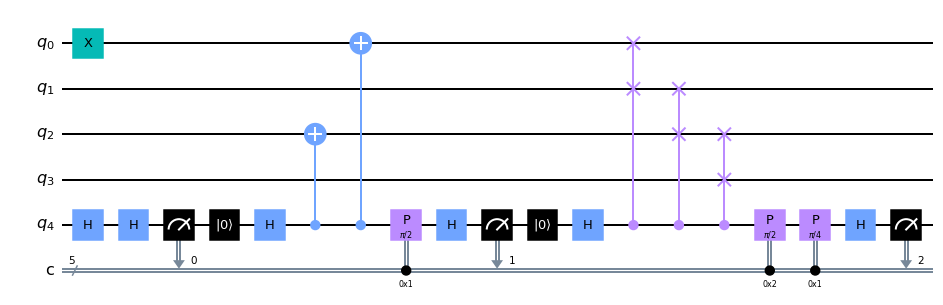

In [6]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')

shor = QuantumCircuit(q, c)
circuit_aperiod15(shor,q,c,8)
shor.draw(output='mpl')

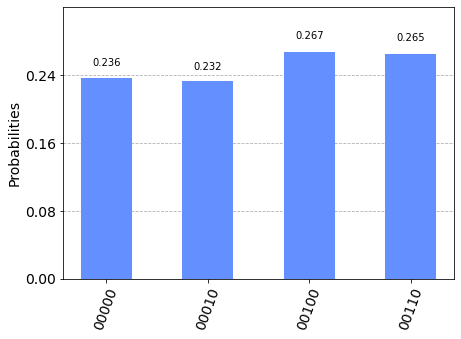

In [7]:
backend = BasicAer.get_backend('qasm_simulator')
sim_job = execute([shor], backend)
sim_result = sim_job.result()
sim_data = sim_result.get_counts(shor) 

plot_histogram(sim_data)

## Algoritmo de Shor para N=15

In [8]:
def Shor(N):
    while True:
        #1) pedir el valor de a
        a = int(input("ingrese el valor de a(<N):"))
        #2) Chequear si el valor escogido de a es un factor de N por medio de GCD(a,N)
        p = gcd(a,N)
        if p != 1:  #
            p1 = p
            p2 = N/p
            break
        #3) encontrar el periodo r con base en la QFT
        circuit_aperiod15(shor1,q1,c1,a)
        backend = BasicAer.get_backend('qasm_simulator')
        sim_job = execute([shor1], backend)
        sim_result = sim_job.result()
        sim_data = sim_result.get_counts(shor1) 
        claves = list(sim_data.keys())  # convertir el diccionario en lista y extraer las claves
        
        if a==11 or 4:
            x1 = int(claves[1],2)       # valor psible de r diferente de cero
            l = gcd(2**3,x1)            # se calcula el gcd entre 8 y el posible valor de r
            r = int((2**3)/l)
        
        else:
            x1 = int(claves[0],2)
            l = gcd(2**3,x1)
            r = int((2**3)/l)
            
        #4) calcular los factores coprimos
        if r % 2 == 0 :                 # Verificar que r se a par
            if a**(r//2) % N != -1:     #Si r es un buen peridio se calcula los facotres de N   
                p1 = gcd(a**(r//2)-1,N) 
                p2 = gcd(a**(r//2)+1,N)
                break              
    print (N," =", p1, "x", p2)
    print ("Por tanto los factores de N son:")
    return p1, p2

In [9]:
q1 = QuantumRegister(5, 'q1')
c1 = ClassicalRegister(5, 'c1')
shor1 = QuantumCircuit(q1, c1)

In [11]:
Shor(15)

ingrese el valor de a(<N): 11
ingrese el valor de a(<N): 11
ingrese el valor de a(<N): 2
ingrese el valor de a(<N): 4


15  = 15 x 1
Por tanto los factores de N son:


(15, 1)

In [12]:
Shor(15)

ingrese el valor de a(<N): 11
ingrese el valor de a(<N): 13


15  = 15 x 1
Por tanto los factores de N son:


(15, 1)

In [13]:
Shor(15)

ingrese el valor de a(<N): 4
ingrese el valor de a(<N): 7


15  = 15 x 1
Por tanto los factores de N son:


(15, 1)

In [14]:
Shor(15)

ingrese el valor de a(<N): 8


15  = 3 x 5
Por tanto los factores de N son:


(3, 5)

In [15]:
Shor(15)

ingrese el valor de a(<N): 2


15  = 15 x 1
Por tanto los factores de N son:


(15, 1)

In [18]:
Shor(15)

ingrese el valor de a(<N): 2


15  = 3 x 5
Por tanto los factores de N son:


(3, 5)